**SIN-393 - Introdução à Visão Computacional (2022-2)**

# Aula 04 - Classificação de imagens

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importando as bibliotecas 
---

In [1]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib notebook

## O dataset - conjunto de dados
---
* Um conjunto de imagens de folhas
* Flavia leaf dataset:
    * http://flavia.sourceforge.net/ 
    * 1.907 imagens
    * 33 classes

### Versões reduzidas do conjunto  Flavia

* Apenas 3 das 33 classes (todas as imagens nessas classes)
    * ```data/flavia```
* Apenas 6 imagens em cada uma das 3 classes
    * ```data/flavia_toy```

In [2]:
# 3 classes - Conjunto completo
ds_path = 'data/flavia'

# 3 classes - 6 imagens por classe
#### ds_path = 'data/flavia_toy'

In [3]:
print(ds_path)

data/flavia


## Carregando as imagens do dataset

In [4]:
# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []
# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))
        
        # Redimensiona a imagem para 1/4 do tamanho original
        img_temp = transform.resize(img_temp, (img_temp.shape[0]//4, img_temp.shape[1]//4), anti_aliasing=True)
        
        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [5]:
# Lista com os rótulos das imagens        
print(label_list)

['acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'acer_palmatum', 'aesculus_chinensis', 'aesculus_chinensis', 'ae

### Convertendo os nomes das classes para índices numéricos

In [6]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

print(type(label_list_idx))
print(label_list_idx)

### label_list_idx = np.array(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


## Plotando as imagens do conjunto de dados
---

In [7]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]

<IPython.core.display.Javascript object>


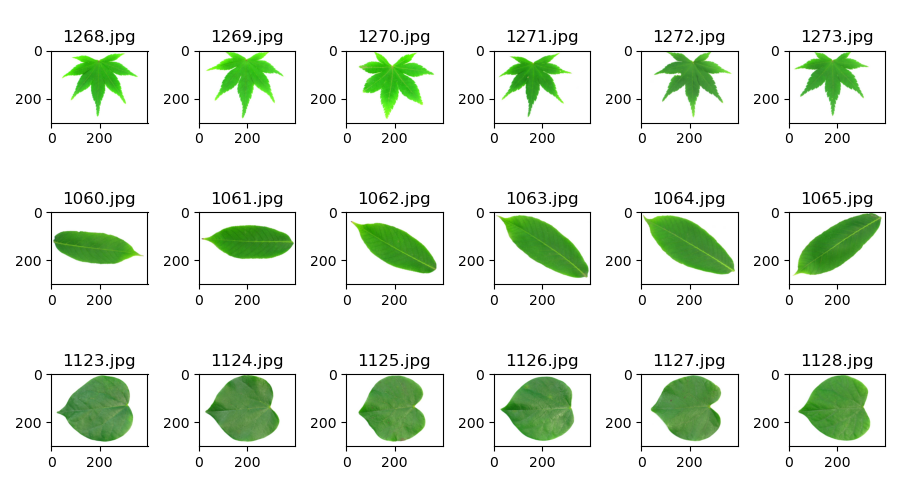

In [8]:
fig, ax  = plt.subplots(3, 6, figsize=(9, 5))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, vmin=0, vmax=255)
    ax[i//6, i%6].set_title(str(filename))
    ### ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Extraindo algumas caracteristicas das imagens
----
* Vamos extrair algumas caracteristicas de forma dos objetos nas imagens.
    * Área, maior eixo, menor eixo, solidez e ecentricidade.
* Para isso, primeiramente é necessário segmentar as folhas presentes na imagem.
    1. Converter o tipo de dados da imagem para float;
    2. Converter a imagem de RGB para níveis de cinza;
    3. Segmentar a imagem usando o método de Otsu;
    4. Remover artefatos resultantes da segmentação com tamanho menor do que 10.000 pixels.

In [9]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']

In [10]:
# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Segmenta a imagem
    # --------------------------------------------------
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    # DEBUG
    ## print(img_float.shape, img_float.min(), img_float.max())
    
    # Converte imagem para níveis de cinza
    img_float = color.rgb2gray(img_float)
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float < filters.threshold_otsu(img_float)
    # DEBUG
    ### print(img_seg.shape, img_seg.min(), img_seg.max())
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 10000)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    ###print(len(props))
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

Imagem 0 - classe acer_palmatum
Imagem 1 - classe acer_palmatum
Imagem 2 - classe acer_palmatum
Imagem 3 - classe acer_palmatum
Imagem 4 - classe acer_palmatum
Imagem 5 - classe acer_palmatum
Imagem 6 - classe acer_palmatum
Imagem 7 - classe acer_palmatum
Imagem 8 - classe acer_palmatum
Imagem 9 - classe acer_palmatum
Imagem 10 - classe acer_palmatum
Imagem 11 - classe acer_palmatum
Imagem 12 - classe acer_palmatum
Imagem 13 - classe acer_palmatum
Imagem 14 - classe acer_palmatum
Imagem 15 - classe acer_palmatum
Imagem 16 - classe acer_palmatum
Imagem 17 - classe acer_palmatum
Imagem 18 - classe acer_palmatum
Imagem 19 - classe acer_palmatum
Imagem 20 - classe acer_palmatum
Imagem 21 - classe acer_palmatum
Imagem 22 - classe acer_palmatum
Imagem 23 - classe acer_palmatum
Imagem 24 - classe acer_palmatum
Imagem 25 - classe acer_palmatum
Imagem 26 - classe acer_palmatum
Imagem 27 - classe acer_palmatum
Imagem 28 - classe acer_palmatum
Imagem 29 - classe acer_palmatum
Imagem 30 - classe a

In [11]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[29342.       232.205    199.5297     0.556      0.5115]
 [31087.       233.9466   212.95       0.545      0.4141]
 [35543.       258.1891   209.7091     0.6449     0.5833]
 [27062.       223.9405   195.1707     0.5223     0.4903]
 [30984.       244.1381   204.6608     0.5199     0.5452]
 [29790.       239.9097   203.7272     0.5144     0.5281]
 [29871.       227.3735   209.8953     0.5217     0.3845]
 [30360.       238.7612   213.2182     0.4821     0.45  ]
 [29805.       233.25     210.2056     0.4952     0.4334]
 [28759.       223.2962   213.6552     0.4895     0.2907]
 [27548.       211.553    206.9062     0.5507     0.2084]
 [25204.       211.1969   203.4272     0.4889     0.2687]
 [28630.       227.2089   199.7958     0.5439     0.4762]
 [26106.       221.1275   188.4564     0.555      0.5231]
 [23891.       209.1415   189.1806     0.5103     0.4264]
 [25017.       208.3371   196.638      0.5467     0.3304]
 [23571.       195.6677   192.4833     0.5506     0.1797]
 [25835.      

In [12]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[17644.       186.2685   115.8991     0.4392     0.0947]
[62862.       414.4931   273.536      0.9852     0.9333]
[42354.0838   290.4514   203.0539     0.8367     0.5645]
[11894.0829    63.5728    44.8535     0.203      0.2618]


### Plotando um subconjunto de imagens segmentadas de cada classe

In [13]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(3):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]

<IPython.core.display.Javascript object>


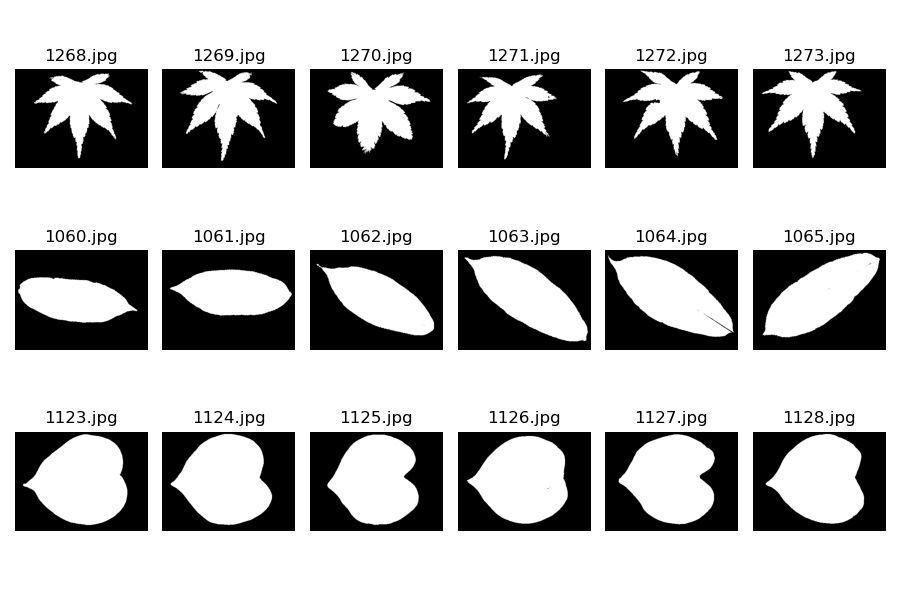

In [14]:
fig, ax  = plt.subplots(3, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

### Plotando as caracteristicas computadas

In [15]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

### print(df)
display(df)

        area  major_axis  minor_axis  solidity  eccentricity             class
0    29342.0  232.204975  199.529713  0.556004      0.511501     acer_palmatum
1    31087.0  233.946621  212.950036  0.544994      0.414058     acer_palmatum
2    35543.0  258.189112  209.709135  0.644876      0.583336     acer_palmatum
3    27062.0  223.940467  195.170735  0.522281      0.490343     acer_palmatum
4    30984.0  244.138067  204.660834  0.519866      0.545210     acer_palmatum
..       ...         ...         ...       ...           ...               ...
186  52783.0  275.922853  249.989406  0.960407      0.423252  cersis_chinensis
187  55381.0  278.709105  256.007588  0.969640      0.395310  cersis_chinensis
188  50425.0  278.672397  236.263361  0.956196      0.530288  cersis_chinensis
189  51701.0  271.737168  246.744777  0.965381      0.418911  cersis_chinensis
190  55449.0  278.739721  256.313115  0.970406      0.392990  cersis_chinensis

[191 rows x 6 columns]


<IPython.core.display.Javascript object>


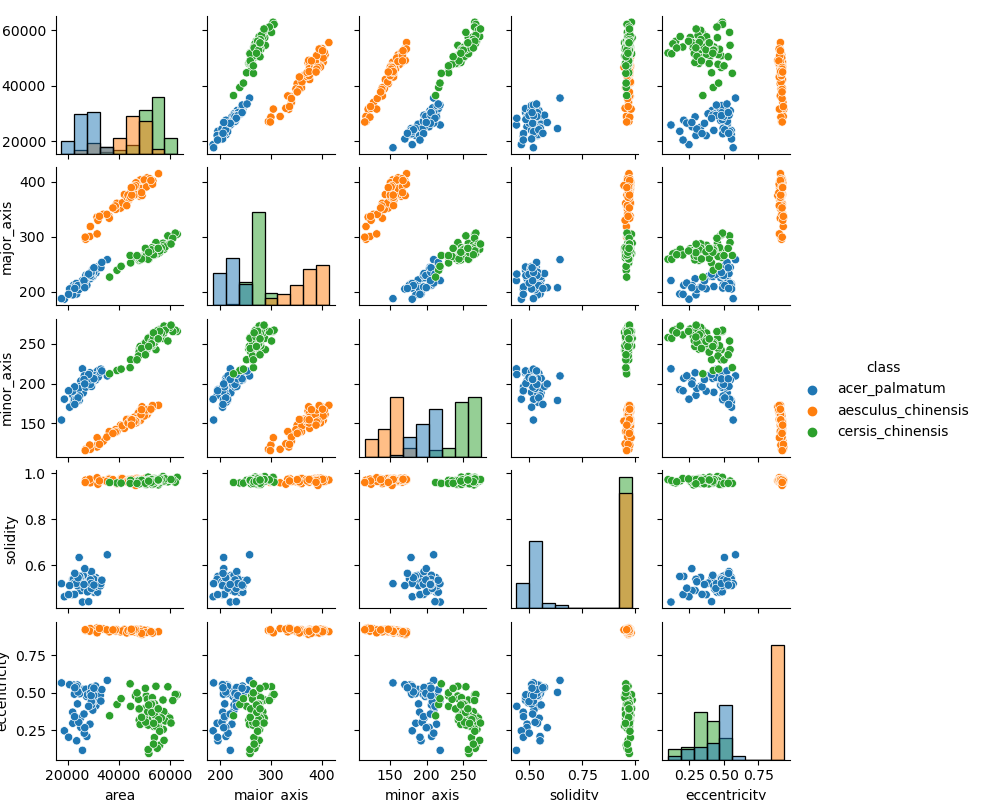

In [16]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Normalizando as caracteristicas
---

* As caracteristicas obtidas podem apresentar faixas de valores muito diferentes. 
    * Isso pode dificultar o treinamento do modelo. 
    * Neste exemplo, a faixa de valores da 'area' vai de 17.644 até 62.862, aproximadamente, já a faixa de valores da circularidade vai de 0,0 até 1,0.
* A normalização transforma as caracteristicas de forma que elas estejam em faixas de valores equivalentes. 
* A ```transformada normal de caracteristicas``` consistem em subtrair a média do conjunto de dados e, em seguida, dividir pelo desvio padrão. 
    * A transformada normal de caracteristicas gera um conjunto de dados com média 0 e desvio padrão 1.

In [17]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[42354.0838   290.4514   203.0539     0.8367     0.5645]
Desvio padrão:
[11894.0829    63.5728    44.8535     0.203      0.2618]


In [18]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

print(feature_map_norm)

[[-1.09399639 -0.9162149  -0.07857123 -1.38279515 -0.20237058]
 [-0.94728479 -0.88881884  0.22063206 -1.43703836 -0.57454407]
 [-0.57264472 -0.50748475  0.14837685 -0.94494887  0.07199665]
 [-1.28568835 -1.0462155  -0.1757537  -1.54893716 -0.28318141]
 [-0.95594456 -0.72850751  0.03582605 -1.56083719 -0.07362298]
 [-1.05633061 -0.79502023  0.01501063 -1.58797844 -0.13897696]
 [-1.0495205  -0.99221327  0.15252631 -1.5518883  -0.68747991]
 [-1.00840762 -0.81308627  0.22660997 -1.74703007 -0.43719211]
 [-1.05506948 -0.89977607  0.15944466 -1.68244694 -0.50067732]
 [-1.14301236 -1.05635055  0.23635439 -1.71020245 -1.04582586]
 [-1.2448277  -1.24107072  0.0858857  -1.40878505 -1.35987546]
 [-1.44190048 -1.24667234  0.00832297 -1.71318743 -1.1295522 ]
 [-1.15385809 -0.9948031  -0.07263954 -1.44220633 -0.33727904]
 [-1.36606445 -1.09046411 -0.32544825 -1.38786731 -0.15795178]
 [-1.5522915  -1.27900234 -0.30930204 -1.60798853 -0.5275921 ]
 [-1.45762258 -1.29165593 -0.1430406  -1.42863232 -0.89

In [19]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[ 0.  0.  0. -0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


### Plotando as caracteristicas normalizadas

In [20]:
df_norm = pd.DataFrame(feature_map_norm, columns=features)

df_norm['class'] = label_list
print(df_norm)

         area  major_axis  minor_axis  solidity  eccentricity  \
0   -1.093996   -0.916215   -0.078571 -1.382795     -0.202371   
1   -0.947285   -0.888819    0.220632 -1.437038     -0.574544   
2   -0.572645   -0.507485    0.148377 -0.944949      0.071997   
3   -1.285688   -1.046215   -0.175754 -1.548937     -0.283181   
4   -0.955945   -0.728508    0.035826 -1.560837     -0.073623   
..        ...         ...         ...       ...           ...   
186  0.876816   -0.228533    1.046417  0.609574     -0.539428   
187  1.095243   -0.184706    1.180591  0.655063     -0.646149   
188  0.678566   -0.185283    0.740398  0.588828     -0.130616   
189  0.785846   -0.294374    0.974079  0.634082     -0.556009   
190  1.100961   -0.184224    1.187403  0.658836     -0.655012   

                class  
0       acer_palmatum  
1       acer_palmatum  
2       acer_palmatum  
3       acer_palmatum  
4       acer_palmatum  
..                ...  
186  cersis_chinensis  
187  cersis_chinensis  
188

<IPython.core.display.Javascript object>


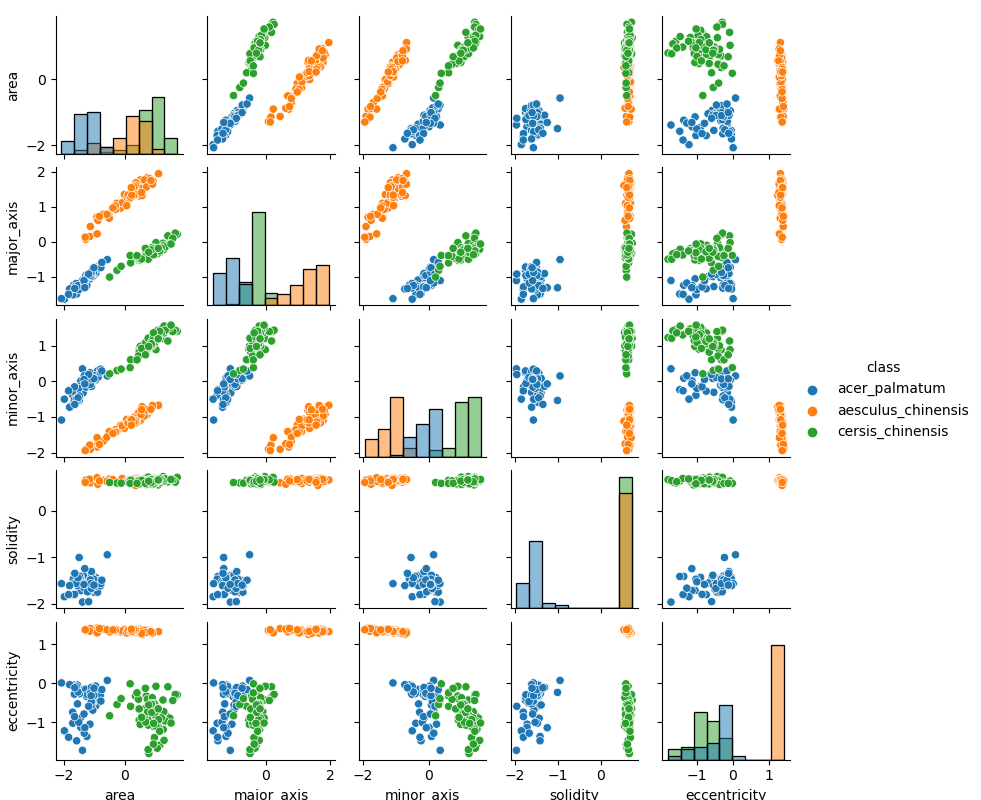

In [21]:
g = sns.PairGrid(df_norm, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Validação cruzada - Hold-out
---

* Separa o conjunto de dados em subconjuntos para treinamento, validação e testes. 
    * Neste exemplo, por motivos de simplificação, vamos dividir em treino e testes apenas.

In [22]:
# Selecionamos apenas duas caracteristicas: Área e maior-eixo
feature_map_ok = feature_map[:,0:2]

In [23]:
# Separa o conjunto de dados em 'feature_map_ok', de acordo com 'label_list'. 
# 30% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_map_ok, 
                                                                    label_list, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

### Normalizando as caracteristicas

* A normalização **não** deve ser realizada sobre todo o conjunto de dados. 
    * A normalização deve ser realizada **após** a divisão do conjunto para a validação cruzada.
    * O conjunto de testes não deve ser acessado, nem direta nem indiretamente, durante o treinamento ou durante o ajuste de hiperparâmetros. 
    * A normalização do conjunto de treinamento e também do conjunto de testes deve ser realizado usando apenas a média e o desvio padrão do conjunto de treinamento.

In [24]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[41890.985    288.8232]
[11390.8405    61.9615]


In [25]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm)
    print(X_test_norm)

[[-2.0308 -1.6551]
 [-1.0641 -0.8932]
 [-1.3143  0.1644]
 [ 0.5364 -0.4566]
 [-0.5721  0.8352]
 [ 0.3677  1.4047]
 [ 1.2384 -0.2859]
 [-0.5573 -0.4944]
 [-1.0236 -0.864 ]
 [ 0.1092  1.0901]
 [ 0.249   1.3374]
 [ 1.1936 -0.2152]
 [-0.8617 -0.7081]
 [ 0.413   1.6796]
 [-1.585  -1.2006]
 [ 0.8612 -0.2758]
 [ 0.5367 -0.518 ]
 [ 1.2859 -0.1597]
 [-1.4649 -1.2528]
 [ 0.2826  1.4006]
 [ 1.0587 -0.1742]
 [-1.0552 -0.9917]
 [-1.6202 -1.1946]
 [-1.2989  0.1031]
 [-0.9575 -0.7212]
 [-1.8497 -1.3551]
 [ 0.7527  1.6829]
 [ 0.7727 -0.2053]
 [ 0.7391 -0.3394]
 [ 1.3684 -0.13  ]
 [-1.2592 -1.2471]
 [ 0.6719 -0.458 ]
 [-0.2842  1.0804]
 [ 0.7816 -0.2022]
 [-1.1017 -0.9138]
 [ 0.5123 -0.4009]
 [ 0.5695 -0.5015]
 [-0.0816  1.1381]
 [ 0.8475 -0.3848]
 [ 0.1399  1.3329]
 [-0.7961 -0.7045]
 [ 0.2663  1.62  ]
 [-1.7458 -1.3495]
 [-0.9781 -0.7519]
 [-0.2232 -0.8063]
 [ 0.8437 -0.3148]
 [-1.6871 -1.328 ]
 [-1.5127 -1.2359]
 [ 1.113  -0.2909]
 [ 1.1992  2.0282]
 [-0.2309  1.159 ]
 [ 0.124   1.3347]
 [-1.0989 -0

## Classificando usando K-vizinhos mais próximos
---

In [26]:
# Constrói um classificador do tipo K-NN
# K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

## Avaliando o modelo
---

In [27]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['cersis_chinensis' 'aesculus_chinensis' 'cersis_chinensis'
 'aesculus_chinensis' 'aesculus_chinensis' 'acer_palmatum' 'acer_palmatum'
 'acer_palmatum' 'cersis_chinensis' 'cersis_chinensis' 'cersis_chinensis'
 'cersis_chinensis' 'acer_palmatum' 'cersis_chinensis'
 'aesculus_chinensis' 'cersis_chinensis' 'cersis_chinensis'
 'aesculus_chinensis' 'cersis_chinensis' 'acer_palmatum' 'acer_palmatum'
 'acer_palmatum' 'aesculus_chinensis' 'aesculus_chinensis'
 'aesculus_chinensis' 'aesculus_chinensis' 'aesculus_chinensis'
 'acer_palmatum' 'acer_palmatum' 'aesculus_chinensis' 'cersis_chinensis'
 'aesculus_chinensis' 'acer_palmatum' 'cersis_chinensis'
 'aesculus_chinensis' 'cersis_chinensis' 'aesculus_chinensis'
 'cersis_chinensis' 'cersis_chinensis' 'acer_palmatum'
 'aesculus_chinensis' 'acer_palmatum' 'cersis_chinensis'
 'aesculus_chinensis' 'aesculus_chinensis' 'acer_palmatum'
 'cersis_chinensis' 'acer_palmatum' 'cersis_chinensis' 'cersis_chinensis'
 'acer_palmatum' 'cersis_chinen

### Matriz de confusão e o relatório de treinamento

In [28]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[17  0  0]
 [ 0 19  0]
 [ 0  0 22]]

Relatório de classificação:
                    precision    recall  f1-score   support

     acer_palmatum       1.00      1.00      1.00        17
aesculus_chinensis       1.00      1.00      1.00        19
  cersis_chinensis       1.00      1.00      1.00        22

          accuracy                           1.00        58
         macro avg       1.00      1.00      1.00        58
      weighted avg       1.00      1.00      1.00        58



## Otimizando hiperparametros com o conjunto de validação
---
* Não se deve realizar a otimização de hiperparâmetros usando o conjunto de testes.
* Dessa forma, separamos uma parte do conjunto de treinamento para validação.
* Para fazer isso usando o Scikit-learn:
    * Primeiro separamos o conjunte do dados total em teste e treino. 
    * Depois separamos o conjunto de treino em validação e conjunto de testes final. 

* *Exemplo:* 20% para testes, 20% para validação e 60% para treinamento.

```
 +-- Conjunto de dados - 100%
     +-- Conjunto de testes - 20%
     +-- Conjunto de treino 1 - 80%
         +-- Conjunto de validação - 20% do conjunto de dados = 25% do conjunto de treino 1 (0,2 / 0,8 = 0,25)
         +-- Conjunto de treino 2 - 60 % do conjunto de dados = 75% do conjunto de treino 1 (0,8 * 0,75 = 0,6)```

* Entretanto, o exemplo anterior estava muito fácil de resolver, conseguimos acertar 100% dos casos na primeira tentativa.
* Vamos escolher outras caracteristicas, para tornar a tarefa um pouco mais dificil para o nosso classificador.

In [29]:
# Selecionamos apenas duas caracteristicas: Área e solidez
feature_map_ok = feature_map[:,[0,3]]

* Vamos melhorar a divisão do conjutno de dados também;
    * Vamsos adotar uma divisão estratificada.
        * A divisão estratificada preserva a proporção entre amostras de cada classe nos conjuntos de treino, validação e testes.

In [30]:
# Separa 20% do conjuto de completo para TESTES. 80% para treinamento 1.
X_train_1, X_test, y_train_1, y_test = model_selection.train_test_split(feature_map_ok, 
                                                                        label_list, 
                                                                        test_size=0.2, 
                                                                        stratify=label_list,
                                                                        random_state=42)

In [31]:
# Separa 25% do conjuto de treinamento 1 para validação.
#   -> Equivale a 20% do conjunto completo. 0,2 / 0,8 = 0,25
X_train_2, X_val, y_train_2, y_val = model_selection.train_test_split(X_train_1, 
                                                                      y_train_1, 
                                                                      test_size=0.25, 
                                                                      stratify=y_train_1,
                                                                      random_state=42)

### Normalizando as caracteristicas
* Obtemos uma estimativa da média e do desvio padrão dos dados a partir do conjunto de treino.

In [32]:
# Média das caracteristicas do conjunto de treinamento
X_train_2_mean = X_train_2.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_2_std = X_train_2.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train_2.mean(0))
    print(X_train_2.std(0))

[42533.9123     0.8339]
[12223.2273     0.2043]


* Normalizamos os dados do conjunto de treino, de validação e de testes usando a média e desvio padrão calculados a partir do conjunto de treino.
* Diferente do que foi realizado no último exemplo (hold-out simples com treino e teste apenas) em que normalizamos as caracteristicas manualmente, aqui vamos usar a função disponível no Scikit-learn.

In [33]:
# Transformada Normal de Caracteristicas (Manual)
# ----
# X_train_2_norm = (X_train_2 - X_train_2_mean) / X_train_2_std
# X_val_norm = (X_val - X_train_2_mean) / X_train_2_std
# X_test_norm = (X_test - X_train_2_mean) / X_train_2_std

# Transformada Normal de Caracteristicas (Sklearn)
# ----
scaler = preprocessing.StandardScaler().fit(X_train_2)
with np.printoptions(precision=4, suppress=True):
    print(f'Média:  \t {np.array(scaler.mean_)}')
    print(f'Desv. pad.: \t {np.array(scaler.scale_)}')

Média:  	 [42533.9123     0.8339]
Desv. pad.: 	 [12223.2273     0.2043]


In [34]:
X_train_2_norm = scaler.transform(X_train_2)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 0.0000 ± 1.0000
Validação: 	 0.0008 ± 0.9222
Teste:   	 -0.0031 ± 0.9923


### Otimizando o valor de *k*
* Vamos encontrar o melhor valor de k para o K-means em termos de acurácia.
* Vamos testar os seguintes valores de 'k': 1, 3, 5, 7 e 9.

In [35]:
k_list = [1, 3, 5, 7, 9]

In [36]:
# Lista com as acurácias de traino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_2_norm, y_train_2)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_2_norm)
    acc_train = metrics.accuracy_score(y_train_2, pred_train)
    
    acc_train_list.append(acc_train)  

<IPython.core.display.Javascript object>


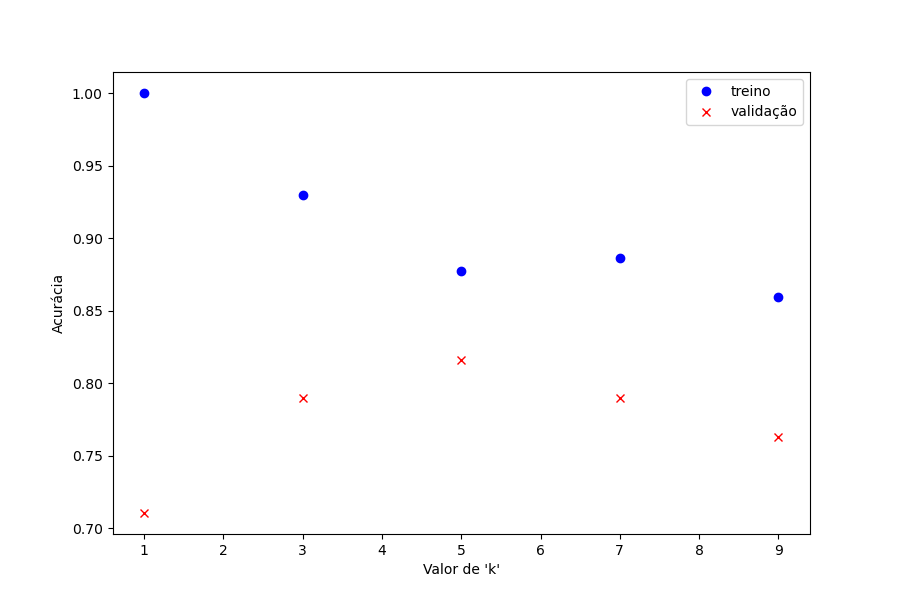

In [37]:
plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [38]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
1 	 1.0000 	 0.7105
3 	 0.9298 	 0.7895
5 	 0.8772 	 0.8158
7 	 0.8860 	 0.7895
9 	 0.8596 	 0.7632

Melhor 'k': 5 (0.8158 acc.)


### Testando o melhor selecionado com o conjunto de testes

In [39]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_2_norm, y_train_2)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(y_test, pred)

* Matriz de confusão e relatório de classificação

In [40]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[11  0  0]
 [ 0 12  1]
 [ 0  5 10]]

Relatório de classificação:
                    precision    recall  f1-score   support

     acer_palmatum       1.00      1.00      1.00        11
aesculus_chinensis       0.71      0.92      0.80        13
  cersis_chinensis       0.91      0.67      0.77        15

          accuracy                           0.85        39
         macro avg       0.87      0.86      0.86        39
      weighted avg       0.87      0.85      0.84        39



## Bibliografia
---
* GONZALEZ, R.C.; WOODS, R.E.; **Processamento Digital de Imagens.** 3ª edição. Editora Pearson, 2009.
* COSTA, L. DA F.; CESAR-JR., R. M. **Shape analysis and classification: teory and practice.** CRC Press, 2000. Capítulo 8.
* Documentação do scikit-image.
    * https://scikit-image.org/docs/stable/
* scikit-learn - User Guide.
    * https://scikit-learn.org/stable/user_guide.html